In [57]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import pandas as pd

In [45]:
root_dir = '/Users/iDev/repos/pgm-fmri/data/fmri/'

def storeData(object, file_name, root_dir):
    with open(root_dir+file_name, 'wb') as f:
        pickle.dump(object, f)					 
        f.close() 

def loadData(file_name, root_dir): 
    with open(root_dir+file_name, 'rb') as f:
        db = pickle.load(f) 
        f.close()
        return db

In [47]:
data = loadData('fmriall_hps_B32_S0_ILC', root_dir=root_dir)

In [48]:
data[0]

{'thresh': 0.0,
 'l1': 0.1,
 'l2': 0.1,
 'params': [FlatMapping({
    'linear': FlatMapping({
                'b': array([-1.1641532e-10,  6.9616362e-08,  5.6868885e-07,  8.0419704e-07,
                             4.2084139e-07], dtype=float32),
                'w': array([[ 1.10849505e-05,  7.41972472e-04,  3.74873402e-04,
                              5.36495470e-04, -7.78466463e-04],
                            [ 9.56351520e-04, -4.56641777e-04,  2.25217082e-05,
                             -8.87517934e-04,  7.35120033e-04],
                            [-3.76558397e-04, -9.83443693e-04,  6.35465607e-04,
                             -3.22305947e-04, -2.06644181e-04],
                            ...,
                            [-6.29448565e-04,  6.64430438e-04,  5.65769034e-04,
                             -8.22325470e-04,  7.69499573e-04],
                            [-8.46937124e-04,  7.27173290e-04, -4.52839653e-04,
                             -5.27857337e-05, -3.94970411e-05],


In [49]:
np.array(data[0]['training_accuracies'])

array([[0.     , 0.65625, 0.65625, 0.4375 , 0.71875, 0.59375, 0.59375,
        0.75   , 0.375  , 0.65625]], dtype=float32)

In [53]:
data[0]['training_accuracies']

[[array(0., dtype=float32),
  array(0.65625, dtype=float32),
  array(0.65625, dtype=float32),
  array(0.4375, dtype=float32),
  array(0.71875, dtype=float32),
  array(0.59375, dtype=float32),
  array(0.59375, dtype=float32),
  array(0.75, dtype=float32),
  array(0.375, dtype=float32),
  array(0.65625, dtype=float32)]]

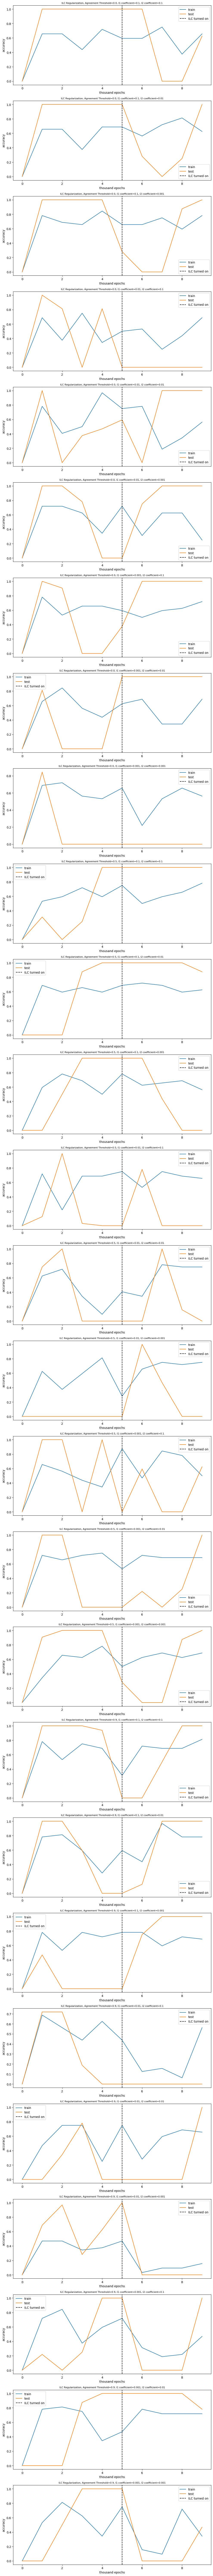

In [62]:
fig, axes = plt.subplots(len(data), 1, figsize=(10, 120), dpi=100, facecolor='w', edgecolor='k')

num=0
for i, experiment in enumerate(data):
  num += 1
  axes[i].plot(np.arange(len(experiment['training_accuracies'][0])), experiment['training_accuracies'][0])
  axes[i].plot(np.arange(len(experiment['testing_accuracies'][0])), experiment['testing_accuracies'][0])
  axes[i].axvline(x=5, color='k', linestyle='--')
  
  one = experiment['thresh']
  two = experiment['l1']
  three = experiment['l2']
  axes[i].set_title('ILC Regularization, Agreement Threshold={}, l1 coefficient={}, l2 coefficient={}'.format(one,two,three),{'fontsize': 8})
  axes[i].legend(('train', 'test', 'ILC turned on'))
  axes[i].set_xlabel('thousand epochs')
  axes[i].set_ylabel('accuracy')

#   plt.suptitle('ILC Regularization, Agreement Threshold={}, l1 coefficient={}, l2 coefficient={}'.format(one,two,three))

# plt.savefig(f'{num}.png')
plt.tight_layout()
plt.savefig('results.png')
plt.show()

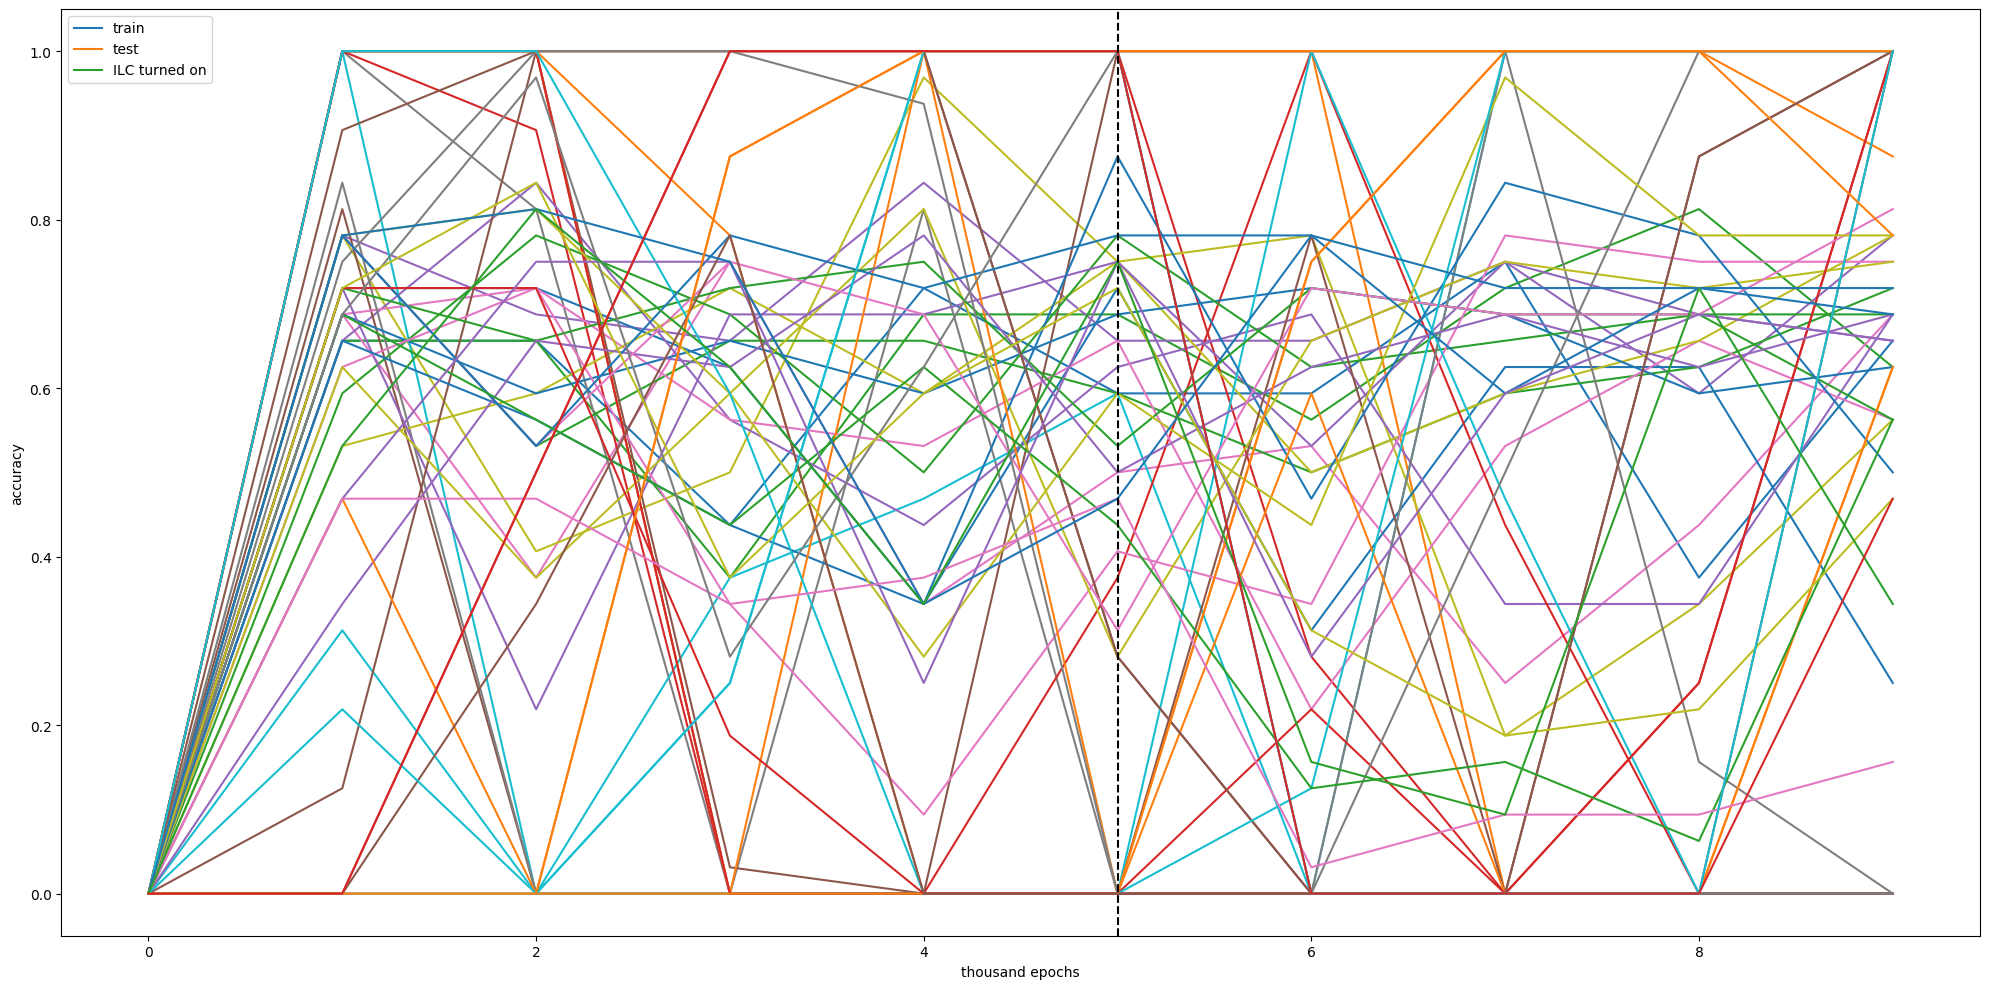

In [52]:
fig, axes = plt.subplots(1, 1, figsize=(20, 10), dpi=100, facecolor='w', edgecolor='k')

num=0
for i, experiment in enumerate(data):
  num += 1
  axes.plot(np.arange(len(experiment['training_accuracies'][0])), experiment['training_accuracies'][0])
  axes.plot(np.arange(len(experiment['testing_accuracies'][0])), experiment['testing_accuracies'][0])
  
  
  one = experiment['thresh']
  two = experiment['l1']
  three = experiment['l2']
#   axes.set_title('ILC Regularization, Agreement Threshold={}, l1 coefficient={}, l2 coefficient={}'.format(one,two,three),{'fontsize': 8})
  axes.legend(('train', 'test', 'ILC turned on'))
  axes.set_xlabel('thousand epochs')
  axes.set_ylabel('accuracy')

#   plt.suptitle('ILC Regularization, Agreement Threshold={}, l1 coefficient={}, l2 coefficient={}'.format(one,two,three))

# plt.savefig(f'{num}.png')
axes.axvline(x=5, color='k', linestyle='--')
plt.tight_layout()
plt.savefig('results.png')
plt.show()

In [201]:
df = pd.DataFrame.from_dict(data)

In [202]:
df.head()

,thresh,l1,l2,params,training_accuracies,testing_accuracies
0,0.0,0.10,0.100,[(linear)],"[[0.0, 0.65625, 0.65625, 0.4375, 0.71875, 0.59...","[[0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0,..."
1,0.0,0.10,0.010,[(linear)],"[[0.0, 0.65625, 0.65625, 0.375, 0.6875, 0.6875...","[[0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.28125, 0.0, ..."
2,0.0,0.10,0.001,[(linear)],"[[0.0, 0.78125, 0.6875, 0.65625, 0.84375, 0.65...","[[0.0, 1.0, 1.0, 1.0, 1.0, 0.28125, 0.0, 0.0, ..."
3,0.0,0.01,0.100,[(linear)],"[[0.0, 0.6875, 0.375, 0.75, 0.34375, 0.5, 0.53...","[[0.0, 1.0, 0.8125, 0.0, 0.8125, 0.0, 0.0, 0.0..."
4,0.0,0.01,0.010,[(linear)],"[[0.0, 0.78125, 0.40625, 0.5, 0.96875, 0.75, 0...","[[0.0, 1.0, 0.0, 0.375, 0.46875, 0.59375, 0.0,..."


In [203]:
df["training_accuracies"] = df["training_accuracies"].apply(pd.Series)
df["testing_accuracies"] = df["testing_accuracies"].apply(pd.Series)

In [204]:
df.convert_dtypes().dtypes  

thresh                 float64
l1                     float64
l2                     float64
params                  object
training_accuracies     object
testing_accuracies      object
dtype: object

In [205]:
df.head()

,thresh,l1,l2,params,training_accuracies,testing_accuracies
0,0.0,0.10,0.100,[(linear)],"[0.0, 0.65625, 0.65625, 0.4375, 0.71875, 0.593...","[0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, ..."
1,0.0,0.10,0.010,[(linear)],"[0.0, 0.65625, 0.65625, 0.375, 0.6875, 0.6875,...","[0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.28125, 0.0, 0..."
2,0.0,0.10,0.001,[(linear)],"[0.0, 0.78125, 0.6875, 0.65625, 0.84375, 0.656...","[0.0, 1.0, 1.0, 1.0, 1.0, 0.28125, 0.0, 0.0, 0..."
3,0.0,0.01,0.100,[(linear)],"[0.0, 0.6875, 0.375, 0.75, 0.34375, 0.5, 0.531...","[0.0, 1.0, 0.8125, 0.0, 0.8125, 0.0, 0.0, 0.0,..."
4,0.0,0.01,0.010,[(linear)],"[0.0, 0.78125, 0.40625, 0.5, 0.96875, 0.75, 0....","[0.0, 1.0, 0.0, 0.375, 0.46875, 0.59375, 0.0, ..."


In [242]:
edf = df.explode('training_accuracies')
udf = df.explode('testing_accuracies')

In [243]:
edf.head()

,thresh,l1,l2,params,training_accuracies,testing_accuracies
0,0.0,0.1,0.1,[(linear)],0.0,"[0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, ..."
0,0.0,0.1,0.1,[(linear)],0.65625,"[0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, ..."
0,0.0,0.1,0.1,[(linear)],0.65625,"[0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, ..."
0,0.0,0.1,0.1,[(linear)],0.4375,"[0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, ..."
0,0.0,0.1,0.1,[(linear)],0.71875,"[0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, ..."


In [244]:
udf.head()

,thresh,l1,l2,params,training_accuracies,testing_accuracies
0,0.0,0.1,0.1,[(linear)],"[0.0, 0.65625, 0.65625, 0.4375, 0.71875, 0.593...",0.0
0,0.0,0.1,0.1,[(linear)],"[0.0, 0.65625, 0.65625, 0.4375, 0.71875, 0.593...",1.0
0,0.0,0.1,0.1,[(linear)],"[0.0, 0.65625, 0.65625, 0.4375, 0.71875, 0.593...",1.0
0,0.0,0.1,0.1,[(linear)],"[0.0, 0.65625, 0.65625, 0.4375, 0.71875, 0.593...",1.0
0,0.0,0.1,0.1,[(linear)],"[0.0, 0.65625, 0.65625, 0.4375, 0.71875, 0.593...",1.0


In [208]:
import seaborn as sn
sn.set()

In [245]:
edf.index.name = 'index'
udf.index.name = 'index'

In [246]:
edf['training_accuracies'] = edf['training_accuracies'].astype(float)
udf['testing_accuracies'] = udf['testing_accuracies'].astype(float)

In [247]:
edf.head()

,thresh,l1,l2,params,training_accuracies,testing_accuracies
index,,,,,,
0,0.0,0.1,0.1,[(linear)],0.00000,"[0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, ..."
0,0.0,0.1,0.1,[(linear)],0.65625,"[0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, ..."
0,0.0,0.1,0.1,[(linear)],0.65625,"[0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, ..."
0,0.0,0.1,0.1,[(linear)],0.43750,"[0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, ..."
0,0.0,0.1,0.1,[(linear)],0.71875,"[0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, ..."


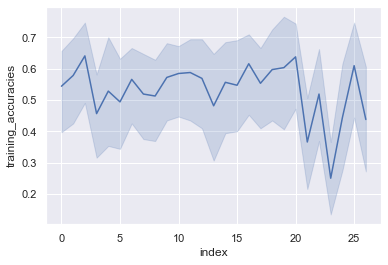

In [213]:
sn.lineplot(data=edf, x='index', y='training_accuracies')

In [248]:
edf['epoch'] = 0
udf['epoch'] = 0

In [249]:
edf.reset_index(inplace=True)
edf.count()

index                  270
thresh                 270
l1                     270
l2                     270
params                 270
training_accuracies    270
testing_accuracies     270
epoch                  270
dtype: int64

In [250]:
udf.reset_index(inplace=True)
udf.count()

index                  270
thresh                 270
l1                     270
l2                     270
params                 270
training_accuracies    270
testing_accuracies     270
epoch                  270
dtype: int64

In [251]:
edf['epoch'] = edf.groupby('index')['index'].cumcount()
edf['epoch'] += 1

In [252]:
udf['epoch'] = edf.groupby('index')['index'].cumcount()
udf['epoch'] += 1

In [253]:
edf.head(20)

,index,thresh,l1,l2,params,training_accuracies,testing_accuracies,epoch
0,0,0.0,0.1,0.10,[(linear)],0.00000,"[0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, ...",1
1,0,0.0,0.1,0.10,[(linear)],0.65625,"[0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, ...",2
2,0,0.0,0.1,0.10,[(linear)],0.65625,"[0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, ...",3
3,0,0.0,0.1,0.10,[(linear)],0.43750,"[0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, ...",4
4,0,0.0,0.1,0.10,[(linear)],0.71875,"[0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, ...",5
5,0,0.0,0.1,0.10,[(linear)],0.59375,"[0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, ...",6
6,0,0.0,0.1,0.10,[(linear)],0.59375,"[0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, ...",7
7,0,0.0,0.1,0.10,[(linear)],0.75000,"[0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, ...",8
8,0,0.0,0.1,0.10,[(linear)],0.37500,"[0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, ...",9
9,0,0.0,0.1,0.10,[(linear)],0.65625,"[0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, ...",10


In [254]:
udf.head(20)

,index,thresh,l1,l2,params,training_accuracies,testing_accuracies,epoch
0,0,0.0,0.1,0.10,[(linear)],"[0.0, 0.65625, 0.65625, 0.4375, 0.71875, 0.593...",0.00000,1
1,0,0.0,0.1,0.10,[(linear)],"[0.0, 0.65625, 0.65625, 0.4375, 0.71875, 0.593...",1.00000,2
2,0,0.0,0.1,0.10,[(linear)],"[0.0, 0.65625, 0.65625, 0.4375, 0.71875, 0.593...",1.00000,3
3,0,0.0,0.1,0.10,[(linear)],"[0.0, 0.65625, 0.65625, 0.4375, 0.71875, 0.593...",1.00000,4
4,0,0.0,0.1,0.10,[(linear)],"[0.0, 0.65625, 0.65625, 0.4375, 0.71875, 0.593...",1.00000,5
5,0,0.0,0.1,0.10,[(linear)],"[0.0, 0.65625, 0.65625, 0.4375, 0.71875, 0.593...",1.00000,6
6,0,0.0,0.1,0.10,[(linear)],"[0.0, 0.65625, 0.65625, 0.4375, 0.71875, 0.593...",1.00000,7
7,0,0.0,0.1,0.10,[(linear)],"[0.0, 0.65625, 0.65625, 0.4375, 0.71875, 0.593...",0.00000,8
8,0,0.0,0.1,0.10,[(linear)],"[0.0, 0.65625, 0.65625, 0.4375, 0.71875, 0.593...",0.00000,9
9,0,0.0,0.1,0.10,[(linear)],"[0.0, 0.65625, 0.65625, 0.4375, 0.71875, 0.593...",0.62500,10


In [260]:
train_df = edf[['index', 'thresh', 'l1', 'l2', 'training_accuracies', 'epoch']].copy()

In [261]:
test_df = udf[['index', 'thresh', 'l1', 'l2', 'testing_accuracies', 'epoch']].copy()

In [262]:
train_df['set'] = 'training'
train_df.head()

,index,thresh,l1,l2,training_accuracies,epoch,set
0,0,0.0,0.1,0.1,0.00000,1,training
1,0,0.0,0.1,0.1,0.65625,2,training
2,0,0.0,0.1,0.1,0.65625,3,training
3,0,0.0,0.1,0.1,0.43750,4,training
4,0,0.0,0.1,0.1,0.71875,5,training


In [263]:
test_df['set'] = 'test'
test_df.head()

,index,thresh,l1,l2,testing_accuracies,epoch,set
0,0,0.0,0.1,0.1,0.0,1,test
1,0,0.0,0.1,0.1,1.0,2,test
2,0,0.0,0.1,0.1,1.0,3,test
3,0,0.0,0.1,0.1,1.0,4,test
4,0,0.0,0.1,0.1,1.0,5,test


In [264]:
train_df.append(test_df, ignore_index=True)

,index,thresh,l1,l2,training_accuracies,epoch,set,testing_accuracies
0,0,0.0,0.100,0.100,0.00000,1,training,NaN
1,0,0.0,0.100,0.100,0.65625,2,training,NaN
2,0,0.0,0.100,0.100,0.65625,3,training,NaN
3,0,0.0,0.100,0.100,0.43750,4,training,NaN
4,0,0.0,0.100,0.100,0.71875,5,training,NaN
...,...,...,...,...,...,...,...,...
535,26,0.9,0.001,0.001,NaN,6,test,1.00000
536,26,0.9,0.001,0.001,NaN,7,test,0.00000
537,26,0.9,0.001,0.001,NaN,8,test,0.00000
538,26,0.9,0.001,0.001,NaN,9,test,0.00000


In [84]:
fig, axes = plt.subplots(1, 1, figsize=(20, 10), dpi=100, facecolor='w', edgecolor='k')

num=0
for i, experiment in enumerate(data):
  num += 1
#   axes.plot(np.arange(len(experiment['training_accuracies'][0])), experiment['training_accuracies'][0])
#   axes.plot(np.arange(len(experiment['testing_accuracies'][0])), experiment['testing_accuracies'][0])
  sn.lineplot(data=df.training_accuracies, x="epochs", y="accuracy")   
#   sn.pointplot(ax=axes, x=training_accuracies, y=training_accuracies, data=df, hue='region')
  
  
  one = experiment['thresh']
  two = experiment['l1']
  three = experiment['l2']
#   axes.set_title('ILC Regularization, Agreement Threshold={}, l1 coefficient={}, l2 coefficient={}'.format(one,two,three),{'fontsize': 8})
#   axes.legend(('train', 'test', 'ILC turned on'))
#   axes.set_xlabel('thousand epochs')
#   axes.set_ylabel('accuracy')

#   plt.suptitle('ILC Regularization, Agreement Threshold={}, l1 coefficient={}, l2 coefficient={}'.format(one,two,three))

# plt.savefig(f'{num}.png')
sn.axvline(x=5, color='k', linestyle='--')
plt.tight_layout()
plt.savefig('results.png')
plt.show()

ValueError: Could not interpret value `accuracy` for parameter `y`